# 1.) Import Libraries & Read Data

In [200]:
# Importing libraries
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
import matplotlib.pyplot as plt
import math 
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, f1_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.metrics import classification_report_imbalanced
from pathlib import Path
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
# Read data 
hotel_path = Path('../Data/hotel_bookings.csv')
hotel = pd.read_csv(hotel_path, infer_datetime_format=True, parse_dates=True)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [202]:
# check datatypes
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Feature Defenition:

- hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled: Value indicating if the booking was canceled (1) or not (0)
- lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year: Year of arrival date
- arrival_date_month: Month of arrival date
- arrival_date_week_number: Week number of year for arrival date
- stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults: Number of adults
- children: Number of children
- babies: Number of babies
- meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
- Country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type.
- booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- deposit_type: Indication on if the customer made a deposit to guarantee the booking
- agent: ID of the travel agency that made the booking
- company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for
- days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type: Type of booking
- adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces: Number of car parking spaces required by the customer
- total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status: Reservation last status
- reservation_status_date: Date at which the last status was set

# 2.) Data Cleaning

In [203]:
hotel.shape

(119390, 32)

In [204]:
# check for nulls
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [205]:
#drop nulls and verify
# hotel.dropna().copy()

In [206]:
# replace null with 0 instead. dropping nulls reduces shape significantly
# NN update to "NA" bc must be string for label encoder
hotel["country"] = hotel["country"].fillna("NA")

In [207]:
hotel["agent"] = hotel["agent"].fillna(0)

In [208]:
hotel["company"] = hotel["company"].fillna(0)

In [209]:
hotel["children"] = hotel["children"].fillna(0) 

In [210]:
#check for duplicates
hotel.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [211]:
hotel.shape

(119390, 32)

In [212]:
# verify that nulls were updated
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# 3.) Preliminary Analysis

In [213]:
# Generate summary statistics 
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


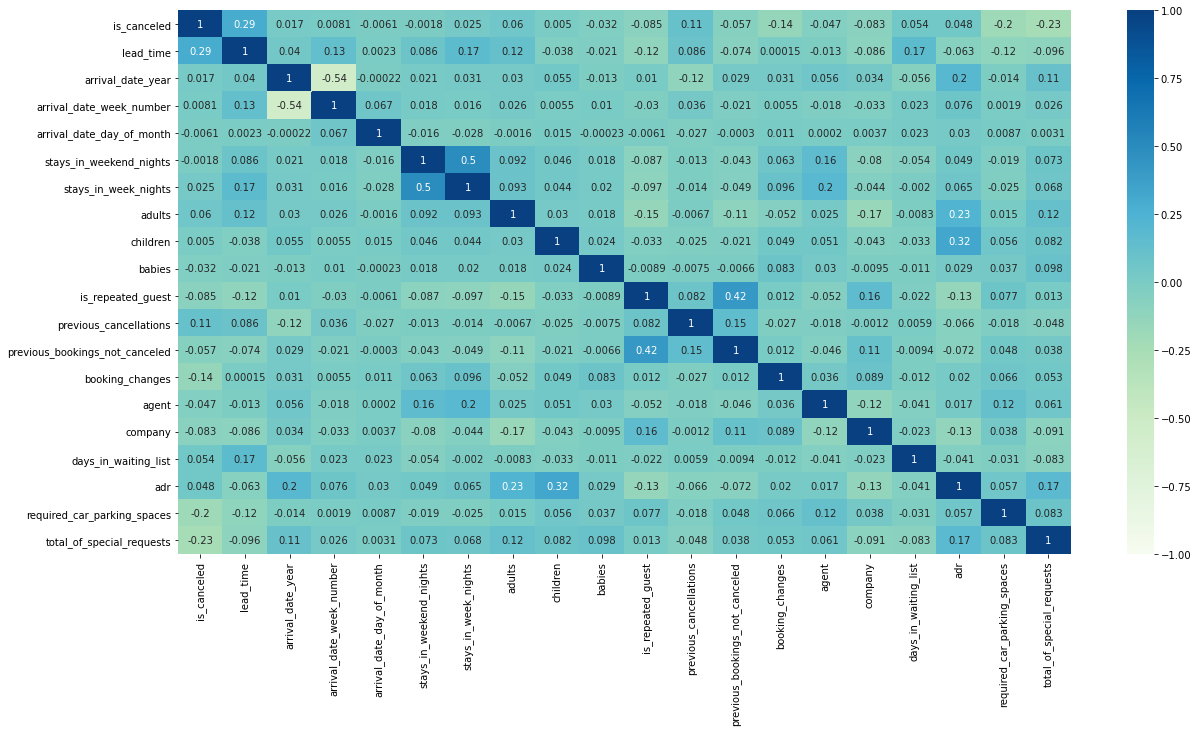

In [214]:
# Identify and plot correlation via heatmap
# We maintained all feature to ensure the most robust dataset
correlation = hotel.corr()
plt.figure(figsize = (20,10))
hotel_corr = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="GnBu").get_figure()

In [215]:
hotel.drop(columns=['reservation_status_date'], inplace=True) #unecessary column since it's highly correlated to arrival_date_year
# NN question: I'm not seeing "reservation_status_date" in the heat map above, nbd right now

In [216]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [217]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [218]:
# hotel_encoded = pd.get_dummies(hotel, columns=['hotel',
#                                                'arrival_date_month',
#                                                 'children',
#                                                'meal',
#                                                'country',
#                                                'market_segment',
#                                                'distribution_channel',
#                                                'reserved_room_type',
#                                                'assigned_room_type',
#                                                'deposit_type',
#                                                 'agent',
#                                                 'company',
#                                                'customer_type',
#                                                'reservation_status',
#                                                'reservation_status_date'])

In [219]:
# Categorical data assignment
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [220]:
label_encoder.fit(hotel["hotel"])
hotel["hotel"] = label_encoder.transform(hotel["hotel"])

In [221]:
label_encoder.fit(hotel["arrival_date_month"])
hotel["arrival_date_month"] = label_encoder.transform(hotel["arrival_date_month"])

In [222]:
# label_encoder.fit(hotel["children"])
# hotel["children"] = label_encoder.transform(hotel["children"])

hotel["children"] = hotel["children"].astype("float")

In [223]:
label_encoder.fit(hotel["meal"])
hotel["meal"] = label_encoder.transform(hotel["meal"])

In [224]:
label_encoder.fit(hotel["country"])
hotel["country"] = label_encoder.transform(hotel["country"])

In [225]:
label_encoder.fit(hotel["market_segment"])
hotel["market_segment"] = label_encoder.transform(hotel["market_segment"])

In [226]:
label_encoder.fit(hotel["distribution_channel"])
hotel["distribution_channel"] = label_encoder.transform(hotel["distribution_channel"])

In [227]:
label_encoder.fit(hotel["reserved_room_type"])
hotel["reserved_room_type"] = label_encoder.transform(hotel["reserved_room_type"])

In [228]:
label_encoder.fit(hotel["assigned_room_type"])
hotel["assigned_room_type"] = label_encoder.transform(hotel["assigned_room_type"])

In [229]:
label_encoder.fit(hotel["deposit_type"])
hotel["deposit_type"] = label_encoder.transform(hotel["deposit_type"])

In [230]:
# label_encoder.fit(hotel["agent"])
# hotel["agent"] = label_encoder.transform(hotel["agent"])

hotel["agent"] = hotel["agent"].astype("float")

In [231]:
# label_encoder.fit(hotel["company"])
# hotel["company"] = label_encoder.transform(hotel["company"])
# NN note, possibly drop company - non relevant as mostly "0"

hotel["company"] = hotel["company"].astype("float")

In [232]:
label_encoder.fit(hotel["customer_type"])
hotel["customer_type"] = label_encoder.transform(hotel["customer_type"])

In [233]:
label_encoder.fit(hotel["reservation_status"])
hotel["reservation_status"] = label_encoder.transform(hotel["reservation_status"])

In [234]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [235]:
# hotel = pd.get_dummies(hotel, columns=['children', 'agent', 'company']). we dont want binary for these columns

In [236]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,0.0,0.0,0,2,0.0,0,0,1
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,0.0,0.0,0,2,0.0,0,0,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0.0,0.0,0,2,75.0,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0.0,0,2,75.0,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0.0,0,2,98.0,0,1,1


# 4.) Identify determinants of reservation cancelation

In [237]:
# Save the encoded file for forthcoming usage
file_path = Path("../Data/hotel_encoded.csv")
hotel.to_csv(file_path, index=False)

In [238]:
# Define features set to assess importance
X = hotel.drop(columns="is_canceled")
y = hotel["is_canceled"] #target

In [239]:
# check target counts: canceled (1) or not (0)
# given the outcome is binary, classifiers will be a good model to use her
y.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [240]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [241]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [242]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [243]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [244]:
### Model #1
# Train data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 

train_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
train_rf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [245]:
# Fitting the model
train_rf = train_rf.fit(X_train_scaled, y_train)

In [246]:
# Making predictions using the testing data
predictions = train_rf.predict(X_test_scaled)

In [247]:
# Print the imbalanced classification report
y_pred_rf = train_rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(classification_report_imbalanced(y_test, y_pred_rf))

0.6416510318949343
                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      1.00      0.03      0.78      0.16      0.03     18853
          1       1.00      0.03      1.00      0.05      0.16      0.02     10995

avg / total       0.77      0.64      0.39      0.51      0.16      0.03     29848



In [248]:
importances = train_rf.feature_importances_
sorted(zip(train_rf.feature_importances_, X.columns), reverse=True)

[(0.7099106293571883, 'reservation_status'),
 (0.06331873439458163, 'deposit_type'),
 (0.04068637285400165, 'lead_time'),
 (0.039798717034510295, 'country'),
 (0.021879982262501332, 'total_of_special_requests'),
 (0.016559113018517528, 'previous_cancellations'),
 (0.015968991504351715, 'market_segment'),
 (0.01339096901011332, 'required_car_parking_spaces'),
 (0.012101062054491924, 'agent'),
 (0.008283308391218061, 'adr'),
 (0.007848025981576414, 'customer_type'),
 (0.007597851386188709, 'booking_changes'),
 (0.0060795186501622425, 'assigned_room_type'),
 (0.005881179962633218, 'distribution_channel'),
 (0.004125340297061809, 'arrival_date_year'),
 (0.003918980434957724, 'arrival_date_week_number'),
 (0.0035941453888031164, 'arrival_date_day_of_month'),
 (0.003379699865898189, 'stays_in_week_nights'),
 (0.002258840748639297, 'arrival_date_month'),
 (0.0021636307344724613, 'hotel'),
 (0.002157056301995018, 'reserved_room_type'),
 (0.0021451838477322183, 'stays_in_weekend_nights'),
 (0.0

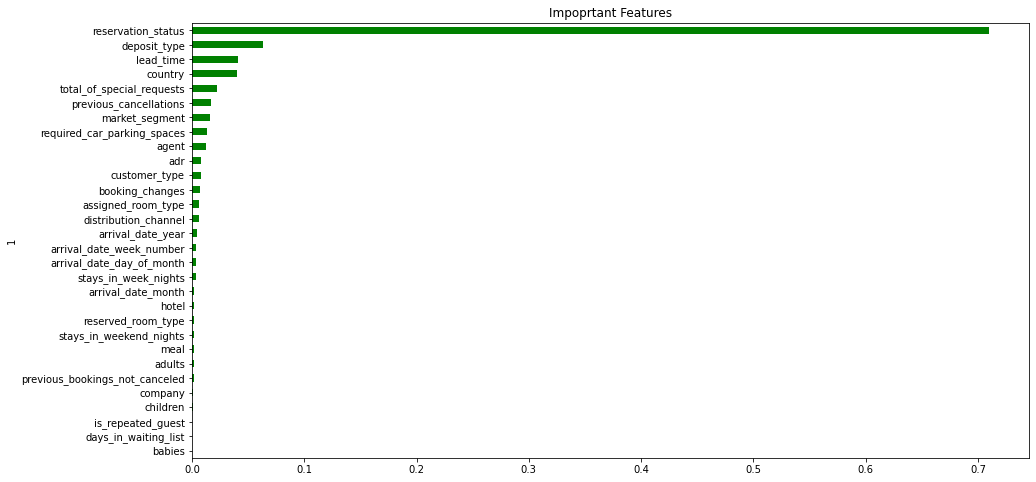

In [249]:
importances_df = pd.DataFrame(sorted(zip(train_rf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Important Features'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Important Features')
importances_sorted.plot(kind='barh', color='green', title='Impoprtant Features', legend=False, figsize=(15,8))

In [250]:
### NN note to the above, we may want to take a look at "reservation_status" because it is either "check out" or "cancelled" and check out only happens after a stay

In [251]:
# Begin NN modelling, look at 2+ models

In [252]:
## 2) Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

train_dt = DecisionTreeClassifier()
train_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [253]:
# Fitting the model
train_dt = train_dt.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = train_dt.predict(X_test_scaled)

In [254]:
# Accuracy score and classification report for 
from sklearn.metrics import accuracy_score, classification_report
acc_score = accuracy_score(y_test, predictions)

y_pred_dt = train_dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

0.6416510318949343
              precision    recall  f1-score   support

           0       0.64      1.00      0.78     18853
           1       1.00      0.03      0.05     10995

    accuracy                           0.64     29848
   macro avg       0.82      0.51      0.42     29848
weighted avg       0.77      0.64      0.51     29848



In [255]:
## 3) Logistic regression
from sklearn.linear_model import LogisticRegression

train_lg = LogisticRegression(solver='lbfgs', random_state=1)
train_lg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [256]:
# Fitting the model
train_lg = train_lg.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = train_lg.predict(X_test_scaled)

y_pred_lg = train_lg.predict(X_test)
print(accuracy_score(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))

0.3683663897078531
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18853
           1       0.37      1.00      0.54     10995

    accuracy                           0.37     29848
   macro avg       0.18      0.50      0.27     29848
weighted avg       0.14      0.37      0.20     29848



In [258]:
### 4 Linear Regression (may need to change the way this is scored)
from sklearn.linear_model import LinearRegression

train_ln = LinearRegression()
train_ln.fit(X_train, y_train)

# Fitting the model
train_ln = train_ln.fit(X_train_scaled, y_train)

In [259]:
# This part needs work

# Making predictions using the testing data
predictions = train_ln.predict(X_test_scaled)

y_pred_ln = train_ln.predict(X_test)
print(accuracy_score(y_test, y_pred_ln))
print(classification_report(y_test, y_pred_ln))

ValueError: Classification metrics can't handle a mix of binary and continuous targets